<a href="https://colab.research.google.com/github/ishikapachori/music-generation-using-rnn/blob/main/music_generation_using_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing MIDI files: 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 21)                  │           2,709 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 21)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 827,669 (3.16 MB)

 Trainable params: 826,389 (3.15 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.0611 - loss: 6.0313
Epoch 1: accuracy improved from -inf to 0.06061, saving model to weights-improvement-01-0.0606.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 598ms/step - accuracy: 0.0610 - loss: 6.0244 - val_accuracy: 0.0800 - val_loss: 4.7235
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.0728 - loss: 5.3690
Epoch 2: accuracy improved from 0.06061 to 0.06566, saving model to weights-improvement-02-0.0657.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - accuracy: 0.0719 - loss: 5.3851 - val_accuracy: 0.0400 - val_loss: 4.7075
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.1304 - loss: 5.4329
Epoch 3: accuracy improved from 0.06566 to 0.12626, saving model to weights-improvement-03-0.1263.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.1299 - loss: 5.4295 - val_accuracy: 0.0000e+00 - val_loss: 4.6903
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.0967 - loss: 5.3604
E

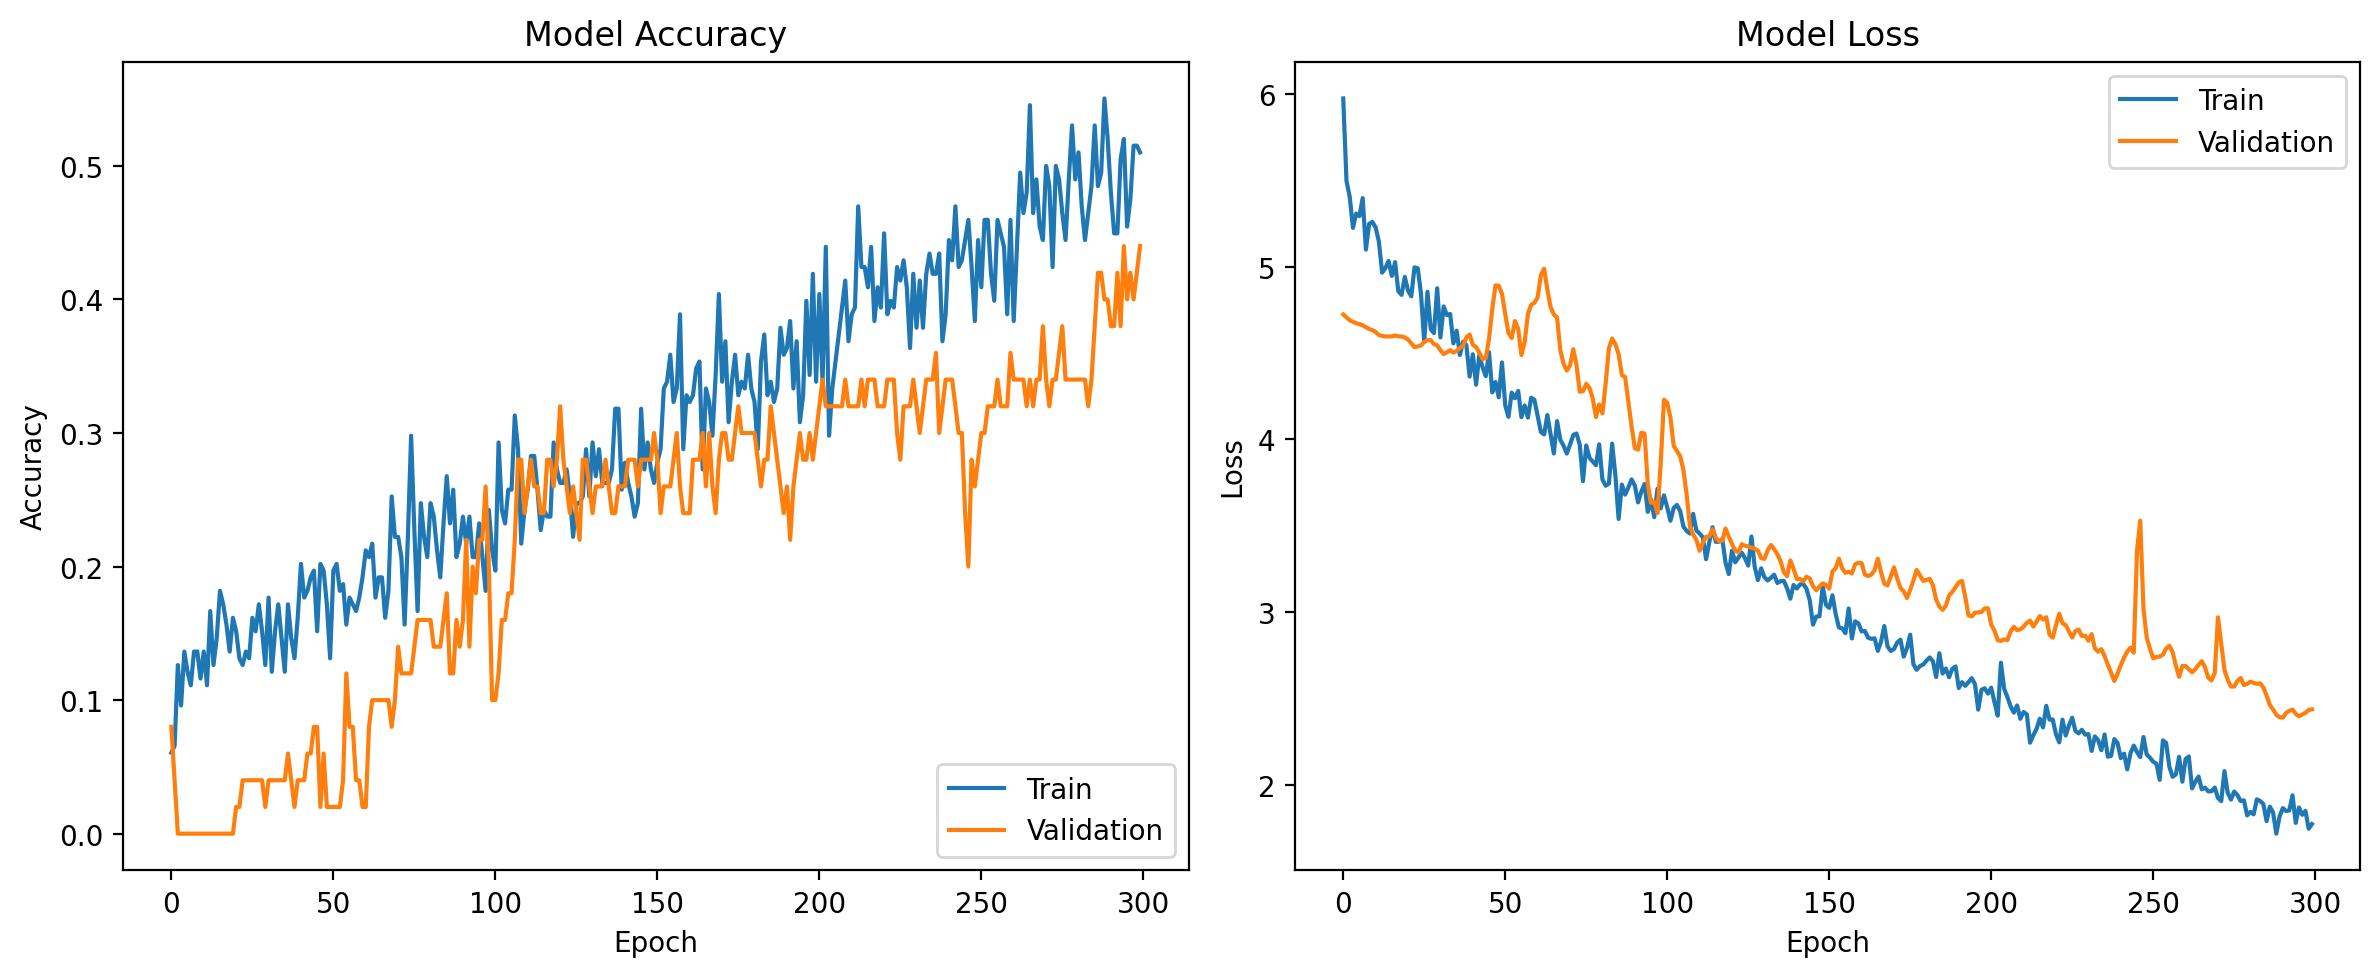

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4972 - loss: 2.1883
Test accuracy: 44.90%
Generating music...


100%|██████████| 500/500 [01:03<00:00,  7.84it/s]


MIDI file saved at: /content/generated_music.mid
Music generated and saved as 'generated_music.mid'
Download the generated music file:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import numpy as np
import glob
import os
from music21 import converter, instrument, note, chord, stream
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, BatchNormalization, Input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm
from google.colab import files

tf.keras.backend.clear_session()

# Step 1: Data Preparation
def extract_notes_from_midi(file_path):
    """Extract all notes and chords from a MIDI file."""
    try:
        midi = converter.parse(file_path)
        notes_to_parse = None

        try:
            s2 = instrument.partitionByInstrument(midi)
            notes_to_parse = s2.parts[0].recurse()
        except:
            notes_to_parse = midi.flat.notes

        notes = []
        for element in notes_to_parse:
            if isinstance(element, note.Note):
                notes.append(str(element.pitch))
            elif isinstance(element, chord.Chord):
                notes.append('.'.join(str(n) for n in element.normalOrder))

        return notes
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return []

def prepare_sequences(notes, sequence_length=30):
    """Prepare the sequences used for the model."""
    pitchnames = sorted(set(notes))

    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    network_input = []
    network_output = []

    for i in range(0, len(notes) - sequence_length):
        sequence_in = notes[i:i + sequence_length]
        sequence_out = notes[i + sequence_length]
        network_input.append([note_to_int[char] for char in sequence_in])
        network_output.append(note_to_int[sequence_out])

    n_patterns = len(network_input)
    n_vocab = len(pitchnames)

    network_input = np.reshape(network_input, (n_patterns, sequence_length))

    network_input = network_input / float(n_vocab)

    network_output = tf.keras.utils.to_categorical(network_output, num_classes=n_vocab)

    return (network_input, network_output, n_vocab, pitchnames, note_to_int)

# Step 2: Build the RNN Model
def build_model(network_input, n_vocab, sequence_length=30):
    """Build the LSTM model."""
    model = tf.keras.Sequential([
        Input(shape=(sequence_length, 1)),
        LSTM(256, return_sequences=True, recurrent_dropout=0.2),
        BatchNormalization(),
        Dropout(0.5),
        LSTM(256),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, kernel_regularizer=l2(0.01)),
        Activation('relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(n_vocab),
        Activation('softmax')
    ])

    optimizer = Adam(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Step 3: Train the Model
def train_model(model, network_input, network_output, epochs=300, batch_size=32):
    """Train the neural network."""
    filepath = "weights-improvement-{epoch:02d}-{accuracy:.4f}.keras"
    checkpoint = ModelCheckpoint(
        filepath,
        monitor='accuracy',
        verbose=1,
        save_best_only=True,
        mode='max'
    )
    callbacks_list = [checkpoint]

    network_input = np.reshape(network_input, (len(network_input), network_input.shape[1], 1))

    history = model.fit(
        network_input,
        network_output,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks_list,
        validation_split=0.2
    )

    return model, history

# Step 4: Generate Music
def generate_notes(model, network_input, pitchnames, note_to_int, n_vocab, num_notes=500, temperature=1.0):
    """Generate notes using the trained model."""
    start = np.random.randint(0, len(network_input)-1)
    pattern = network_input[start]
    prediction_output = []

    for note_index in tqdm(range(num_notes)):
        x = np.reshape(pattern, (1, len(pattern), 1))
        x = x / float(n_vocab)

        prediction = model.predict(x, verbose=0)[0]

        prediction = np.log(prediction + 1e-10) / temperature
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)

        index = np.random.choice(range(len(prediction)), p=prediction)

        result = pitchnames[index]
        prediction_output.append(result)

        pattern = np.append(pattern[1:], index / float(n_vocab))

    return prediction_output

def create_midi(prediction_output, filename="generated_music.mid"):
    """Convert the predicted notes into a MIDI file."""
    offset = 0
    output_notes = []

    for pattern in prediction_output:
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        offset += 0.5

    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp=filename)
    print(f"MIDI file saved at: {os.path.abspath(filename)}")

def evaluate_model(model, test_input, test_output):
    """Evaluate model accuracy on test data."""
    test_input = np.reshape(test_input, (len(test_input), test_input.shape[1], 1))
    test_loss, test_accuracy = model.evaluate(test_input, test_output)
    return test_loss, test_accuracy

def plot_training_history(history):
    """Plot the training history."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

def main():
    midi_files = glob.glob("midi_songs/*.mid")

    if not midi_files:
        print("No MIDI files found. Please place MIDI files in a directory named 'midi_songs'")
        return

    notes = []
    for file in tqdm(midi_files, desc="Processing MIDI files"):
        notes_from_file = extract_notes_from_midi(file)
        notes.extend(notes_from_file)

    os.makedirs("data", exist_ok=True)
    with open('data/notes', 'wb') as filepath:
        pickle.dump(notes, filepath)

    sequence_length = 30
    network_input, network_output, n_vocab, pitchnames, note_to_int = prepare_sequences(notes, sequence_length)

    with open('data/pitchnames', 'wb') as filepath:
        pickle.dump(pitchnames, filepath)
    with open('data/note_to_int', 'wb') as filepath:
        pickle.dump(note_to_int, filepath)

    model = build_model(network_input, n_vocab, sequence_length)
    model.summary()

    model, history = train_model(model, network_input, network_output, epochs=300, batch_size=32)  # Increased epochs

    model.save('trained_model.keras')

    plot_training_history(history)


    test_size = int(len(network_input) * 0.2)
    test_input = network_input[-test_size:]
    test_output = network_output[-test_size:]

    test_loss, test_accuracy = evaluate_model(model, test_input, test_output)
    print(f"Test accuracy: {test_accuracy*100:.2f}%")

    print("Generating music...")
    prediction_output = generate_notes(model, network_input, pitchnames, note_to_int, n_vocab, num_notes=500)
    create_midi(prediction_output, "generated_music.mid")
    print("Music generated and saved as 'generated_music.mid'")

    print("Download the generated music file:")
    files.download("generated_music.mid")

if __name__ == "__main__":
    os.makedirs("midi_songs", exist_ok=True)
    os.makedirs("data", exist_ok=True)

    main()